In [77]:
import torch
from torchvision import models
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

In [78]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [79]:
model = models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()

# model = models.segmentation.deeplabv3_resnet101(weights=models.segmentation.DeepLabV3_ResNet101_Weights.DEFAULT, progress=True)

# num_classes = 3

# model.classifier[4] = torch.nn.Conv2d(256, num_classes, kernel_size=1)

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [80]:
image = Image.open("image.jpg")

input_tensor = transform(image)

In [81]:
input_batch = input_tensor.unsqueeze(0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
input_batch = input_batch.to(device)

In [ ]:
import torch
from torchvision import models
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
model = models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()

# model = models.segmentation.deeplabv3_resnet101(weights=models.segmentation.DeepLabV3_ResNet101_Weights.DEFAULT, progress=True)

# num_classes = 3

# model.classifier[4] = torch.nn.Conv2d(256, num_classes, kernel_size=1)

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
image = Image.open("image.jpg")

input_tensor = transform(image)

In [ ]:
input_batch = input_tensor.unsqueeze(0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
input_batch = input_batch.to(device)

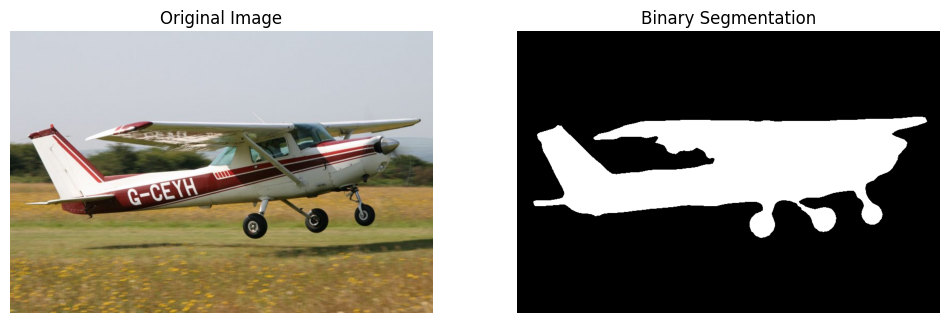

In [ ]:
with torch.no_grad():
    output = model(input_batch)['out'][0]


output_predictions = output.argmax(0)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(output_predictions.cpu().numpy(), cmap='gray')
axes[1].set_title(f"Binary Segmentation")
axes[1].axis('off')

plt.show()
